In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [2]:
np.random.seed(0)
dates =pd.date_range(start='2022-01-01',end ='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand (len(dates)) *50
ts =  pd.Series(values,index = dates)


In [3]:
#dividir los datos entrenamiento y prueba

train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]

In [4]:
model = ARIMA(train_data, order=(10,1,10))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
#ajustar el modelo

forecast = model_fit.forecast(steps=len(test_data))



<function matplotlib.pyplot.show(close=None, block=None)>

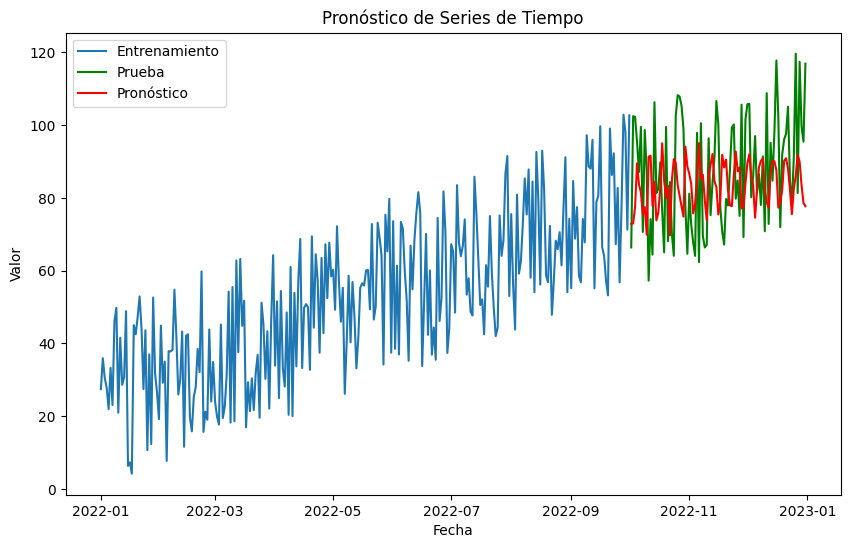

In [6]:
#graficar los datos originales y pronostico

plt.figure(figsize=(10,6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data, label='Prueba', color ='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color ='red')
plt.legend()
plt.title('Pronóstico de Series de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show